In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_csv('../out/study2.csv')
data['FS'] = data['method'].apply(lambda x: x.split('_')[0][2])
data['HT'] = data['method'].apply(lambda x: x.split('_')[1][2])
data

,metric,mean,method,i,dataset,FS,HT
0,CCC,0.182727,FS0_HT0,0,sim_null,0,0
1,MAE,0.755556,FS0_HT0,0,sim_null,0,0
2,R2,0.095328,FS0_HT0,0,sim_null,0,0
3,RMSE,0.951615,FS0_HT0,0,sim_null,0,0
4,RMSPE,5.735780,FS0_HT0,0,sim_null,0,0
...,...,...,...,...,...,...,...
47995,RMSE,6.230561,FS1_HT1,499,spectral,1,1
47996,RMSPE,0.128493,FS1_HT1,499,spectral,1,1
47997,RSR,0.997499,FS1_HT1,499,spectral,1,1
47998,r,0.149350,FS1_HT1,499,spectral,1,1


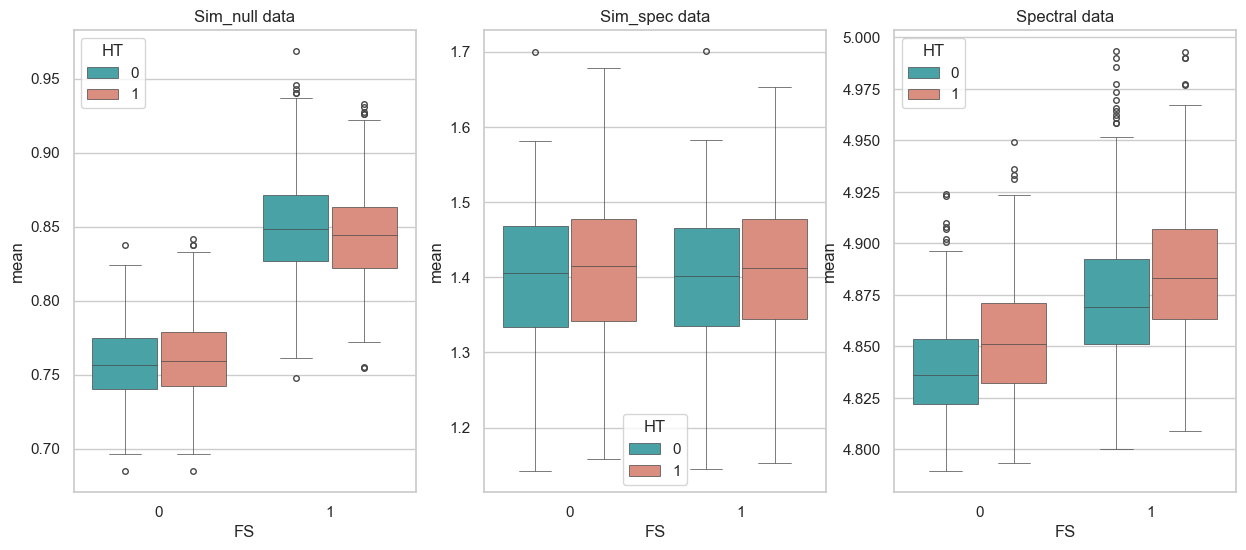

In [8]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471"]

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, m in enumerate(["sim_null", "sim_spec", "spectral"]):
    sns.boxplot(
        data=data.query(f"dataset == '{m}' and metric == 'MAE'"),
        x="FS", y="mean",
        hue="HT",
        gap=0.05,
        linewidth=0.5,
        fliersize=4,
        palette=palette,
        ax=axes[i],
    )
    # axes[i].axhline(
    #     y=0,
    #     color="black",
    #     linestyle="--",
    #     linewidth=0.7,
    # )
    axes[i].set_title(f"{m.capitalize()} data")

# axes[1].set_ylim(0.2, 0.4)